Project - Second Portfolio Project


#### | Introduction |


Titanic was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on 15 April 1912 after 
striking an iceberg during her maiden voyage from Southampton, UK,   to New-York City.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import copy
%matplotlib inline 
sns.set()

In [60]:
df = pd.read_csv('titanic copy.csv')
df.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### - Dictionary
        - Survived: 
                survived or not (0  = did not survive, 1 = survived). 
        - pclass: 
                1= upper class, 2 = middle class, 3 = lower class. 
        - name: 
                last name, first middel (maiden).
        - gender: 
                female, or male.
        - age: 
                Age in years.
        - sibsp: 
                number of siblings and spouses aboard the ship. 
                
        - parch: 
                number of parents or children aboard the ship. 
                
        - ticket: 
               ticket number. 
        - fare:
               ticket price or fair (in what units? euro? pounds?).
        - cabin:
               Cabin number.
        - embarked:
              port of embarkation:
              - C = cherbourg.
              - Q = Queenstown.
              - S = Southampton.


### | Meta Data| 

In [61]:
# general info about the data and its types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   gender    891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [62]:
df.shape

(891, 11)

In [63]:
# addressing the age empty values
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:

nrows = 891
ncols = 11
n_num_cols = 6
n_str_cols = 5

In [65]:
print('There are {0} rows and {1} columns in this dataset.'.format(nrows, ncols))
print('Of those columns, there are {0} numerical columns and {1} categorical columns.'.format(n_num_cols, n_str_cols))

There are 891 rows and 11 columns in this dataset.
Of those columns, there are 6 numerical columns and 5 categorical columns.


### | Cleaning |

<AxesSubplot:>

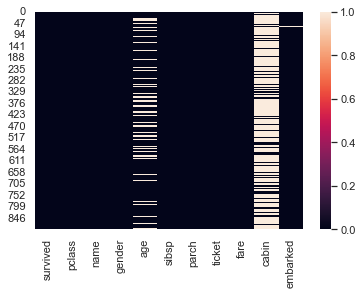

In [66]:
# lookup for null values
sns.heatmap(df.isnull())

In [67]:
#dropping the cabin column
df.drop('cabin',axis=1,inplace=True)

In [68]:
# Fill in the nan values with the mean of age 
df['age']=df['age'].fillna(round(age_mean,2))

In [69]:
df.isnull().sum()

survived    0
pclass      0
name        0
gender      0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    2
dtype: int64

In [70]:
df.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### | Exploring |

#### | Table Visualization | 

In [71]:
# number of survivors
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [72]:
df['gender'].value_counts()

male      577
female    314
Name: gender, dtype: int64

In [73]:
# number of survivors for each gender 
df.groupby(['survived', 'gender'])['gender'].count()

survived  gender
0         female     81
          male      468
1         female    233
          male      109
Name: gender, dtype: int64

In [74]:
df.groupby(['survived', 'pclass'])['gender'].count()

survived  pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: gender, dtype: int64

In [75]:
# survived percentage
survived_percentage = ((df['survived']==1).sum()/(df['survived']).count()) *100
survived_percentage 

38.38383838383838

In [76]:
print('About {0}% of people in this dataset have survived'.format(np.round(survived_percentage, 2))) 

About 38.38% of people in this dataset have survived


In [77]:
# Percentage of surviving female
Percentageـofـsurviving_female = (sum(df.loc[df['gender'] == 'female']["survived"])/(df['survived']==1).sum()) *100
Percentageـofـsurviving_female 
print('About {0}% of people in this dataset have survived from female'.format(np.round(Percentageـofـsurviving_female, 2))) 

About 68.13% of people in this dataset have survived from female


In [78]:
Percentageـofـsurviving_male = (sum(df.loc[df['gender'] == 'male']["survived"])/(df['survived']==1).sum()) *100
Percentageـofـsurviving_male 
print('About {0}% of people in this dataset have survived from male'.format(np.round(Percentageـofـsurviving_male, 2))) 

About 31.87% of people in this dataset have survived from male


#### | Charts Visulaization |

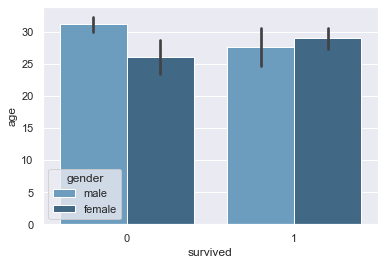

In [79]:
sns.barplot(x="survived", y="age", hue="gender", data=df, palette="Blues_d");

<AxesSubplot:xlabel='pclass', ylabel='age'>

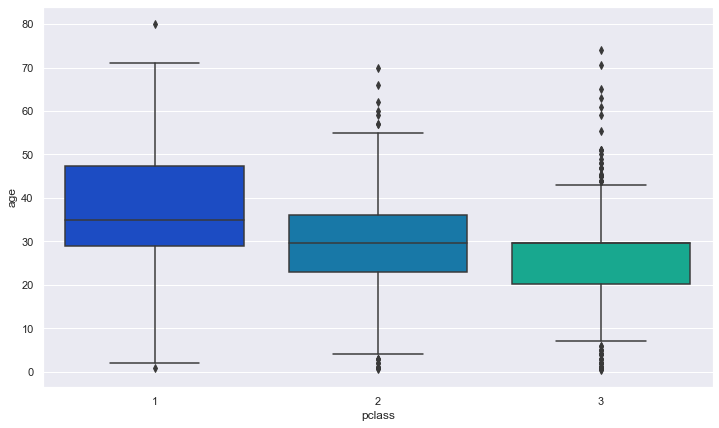

In [80]:
# Display the statistical data for the ages for each class
plt.figure(figsize=(12, 7))
sns.boxplot(x='pclass',y='age',data=df,palette='winter')

<AxesSubplot:>

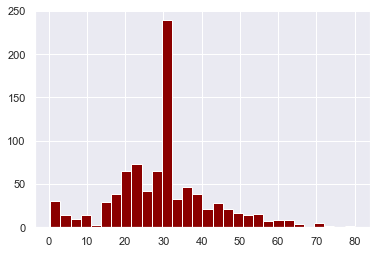

In [81]:
df['age'].hist(bins=30,color='darkred')

<AxesSubplot:>

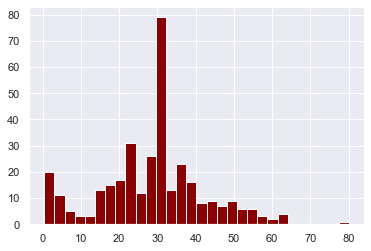

In [86]:
(df.loc[df['survived'] == 1]["age"]).hist(bins=30,color='darkred')

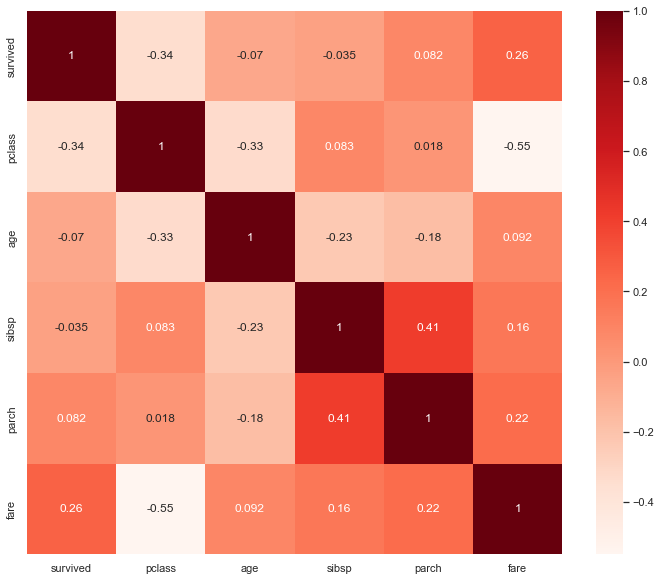

In [82]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show(); 

#### | conclosion |


- About 38.38% of people in this dataset have survived
- About 31.87% of people in this dataset have survived from male
- About 68.13% of people in this dataset have survived from female
- people are in the first class more safe than other 